# Lecture 10 Assignment
## Bernardo Gutierrez

### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


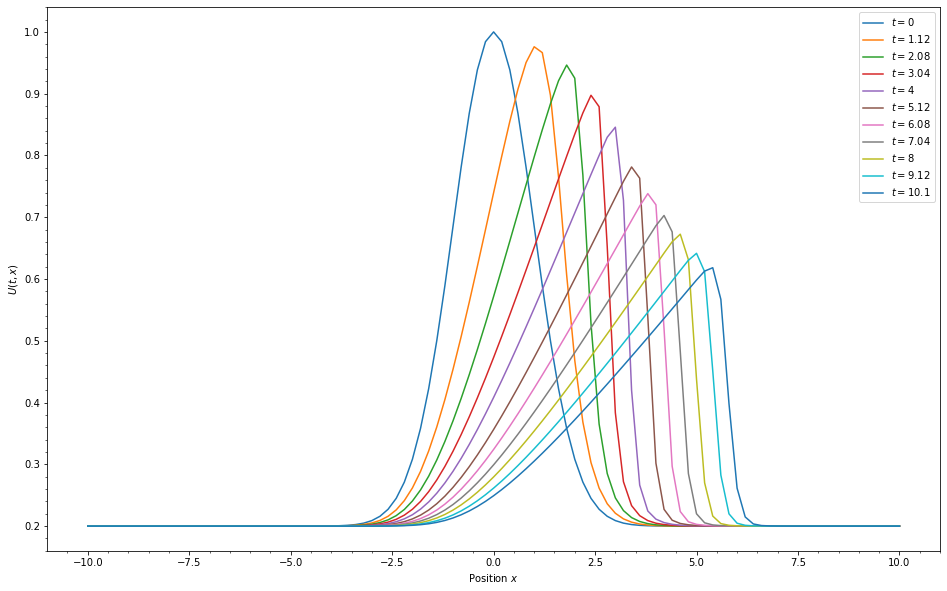

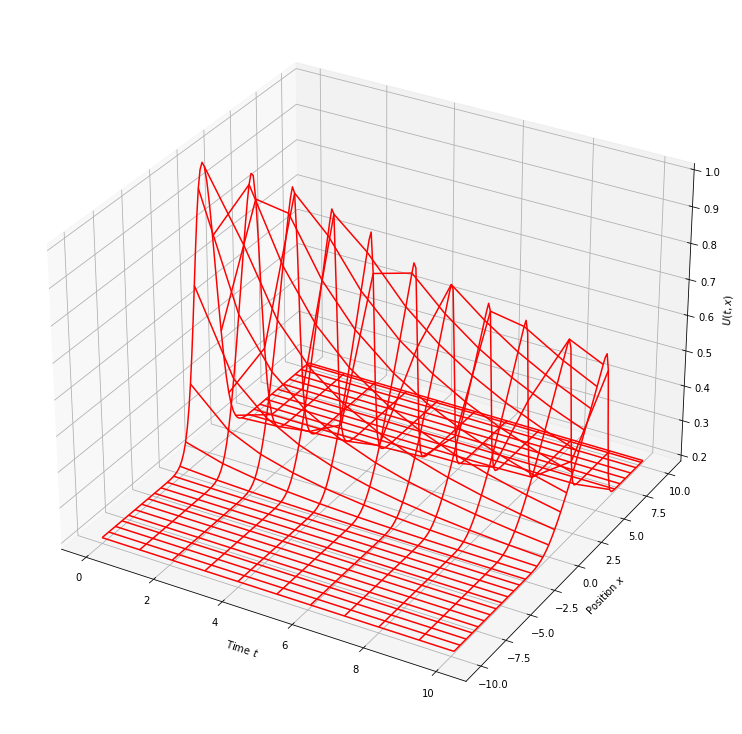

In [1]:
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = .8*dx
U = np.zeros(Nx,)

# Give the initial profile.

t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

#Now we're ready to run our simulation
tout = t + dtout
while t < tend:
    #Want to save U since upwind method calculates U_n+1 from U_n
    Uold = np.copy(U)
    vel=Uold

    #This code is flipped from the lecture since vel is a function in space now
    for ix in range(1, Nx - 1):
        if vel[ix] > 0:
            U[ix]=Uold[ix]-vel[ix]*dt*(Uold[ix]-Uold[ix-1])/dx # Task: implement upwind method here.
            
        else:
            U[ix]=Uold[ix]-vel[ix]*dt*(Uold[ix+1]-Uold[ix])/dx # Task: implement upwind method here.
            
    t += dt
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

2)Please experiment with different grid sizes.

For these trials I'm going to use one trial where dx=dt and one where dt=.01*dt

t =  1.0
t =  2.1999999999999997
t =  3.0000000000000004
t =  4.000000000000001
t =  5.000000000000002
t =  6.000000000000003
t =  7.0000000000000036
t =  8.000000000000004
t =  9.0
t =  10.199999999999996
Done.


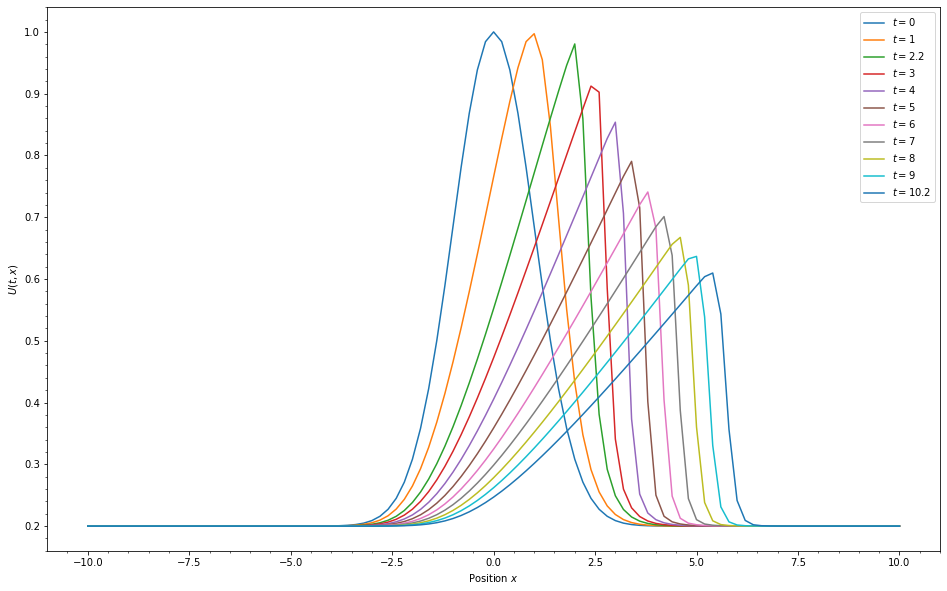

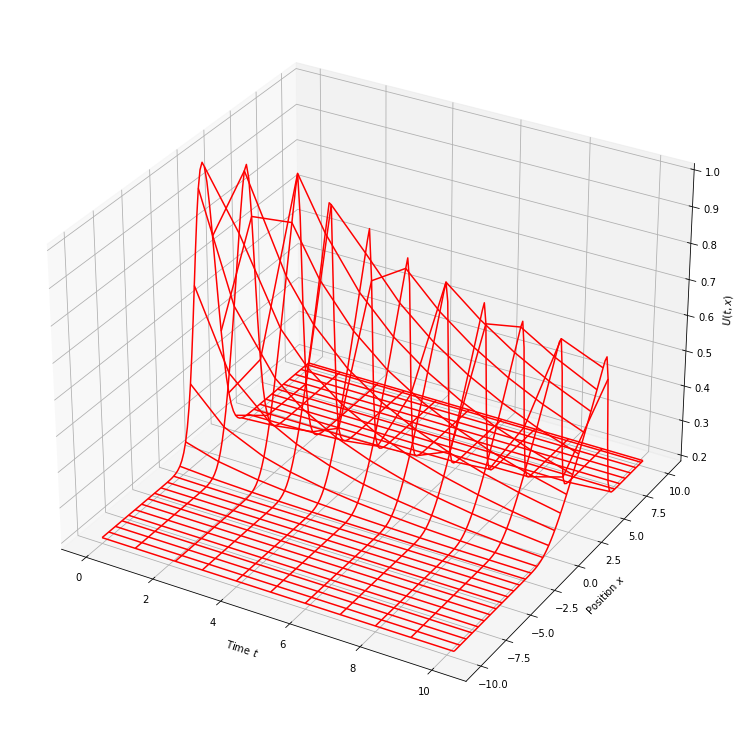

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0
xmax = +10.0
Nx = 101
tend = 10.0
dtout = 1.0

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    Uold = np.copy(U)
    vel=Uold
    
    for ix in range(1, Nx - 1):
        if vel[ix] > 0:
            U[ix]=Uold[ix]-vel[ix]*dt*(Uold[ix]-Uold[ix-1])/dx # Task: implement upwind method here.
            
        else:
            U[ix]=Uold[ix]-vel[ix]*dt*(Uold[ix+1]-Uold[ix])/dx # Task: implement upwind method here.
            
    t += dt
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.001999999999891
t =  4.001999999999781
t =  5.001999999999671
t =  6.001999999999561
t =  7.001999999999451
t =  8.001999999999342
t =  9.001999999999676
t =  10.000000000000009
Done.


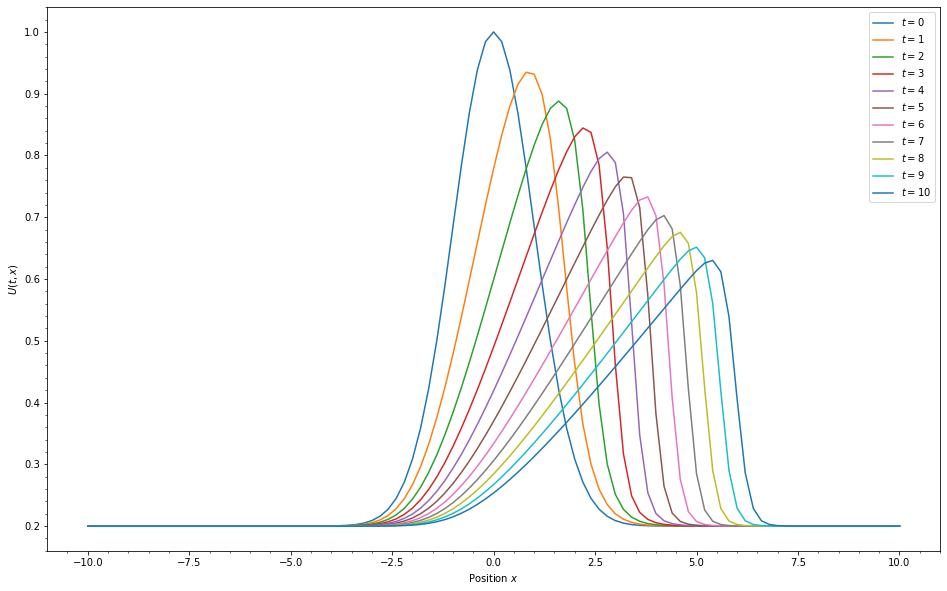

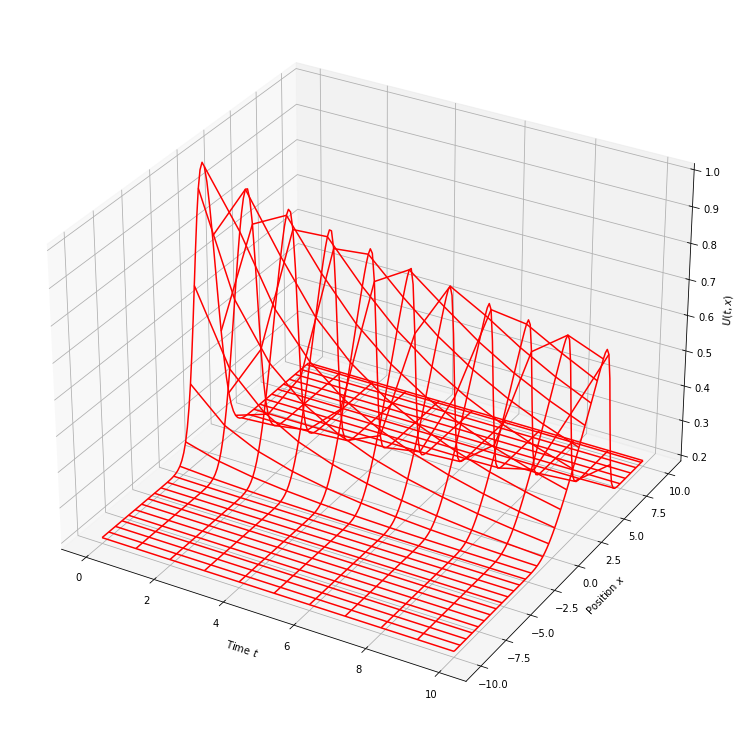

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0
xmax = +10.0
Nx = 101
tend = 10.0
dtout = 1.0

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = .01*dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    Uold = np.copy(U)
    vel=Uold
    
    for ix in range(1, Nx - 1):
        if vel[ix] > 0:
            U[ix]=Uold[ix]-vel[ix]*dt*(Uold[ix]-Uold[ix-1])/dx # Task: implement upwind method here.
            
        else:
            U[ix]=Uold[ix]-vel[ix]*dt*(Uold[ix+1]-Uold[ix])/dx # Task: implement upwind method here.
            
    t += dt
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

Compared to the original results from part 1, using a time step equal to our space step results in some sharp peaks early in the simulation, but really small time steps have little to no effect on the simulation

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

Burger's Equation has the following form:

\begin{eqnarray}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0, \qquad u(x,0)=F(x).\\
\end{eqnarray}

By method of charateristics, Burger's Equation has the following characteristic equations:

\begin{eqnarray}
\frac{\partial x}{\partial t}=u, \qquad \frac{\partial u}{\partial t}=0.\\
\end{eqnarray}

Integrating gives us

\begin{eqnarray}
x=ut+\xi, \qquad u=c\\
\end{eqnarray}

Along characteristic lines u does not vary  with t thus
\begin{equation}
u=c=u(\xi,0)=f(\xi)\\
\end{equation}

Plugging into the expression x yields

\begin{equation}
x=f(\xi)t+\xi\\
\end{equation}

Therefore,

\begin{equation}
u(x,t)=f(\xi)=f(x-ut)
\end{equation}

From this expression we can make two conclussions. 1) The shape of the propagating wave depends on the u, and 2) points with large u will propagate faster.